In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uselog = pd.read_csv('./use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [4]:
customer = pd.read_csv('./customer_join.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,mean,median,max,min,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,1,4.833333,5.0,8,2,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,1,5.083333,5.0,7,3,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,1,4.583333,5.0,6,3,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,1,4.833333,4.5,7,2,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,1,3.916667,4.0,6,1,2019-04-30,47


In [7]:
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [8]:
customer_clustering = customer[['mean','median','max','min','membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [17]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
clusters.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [18]:
customer_clustering = customer_clustering.assign(cluster = clusters.labels_)
customer_clustering

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [19]:
customer_clustering['cluster'].unique()

array([2, 1, 0, 3], dtype=int32)

In [20]:
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


In [23]:
customer_clustering.columns = ['月内利用平均値','月内利用中央値','月内利用最大値','月内利用最小値','会員期間','cluster']

,月内利用平均値,月内利用中央値,月内利用最大値,月内利用最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [24]:
customer_clustering.groupby('cluster').count()

,月内利用平均値,月内利用中央値,月内利用最大値,月内利用最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [25]:
customer_clustering.groupby('cluster').mean()

,月内利用平均値,月内利用中央値,月内利用最大値,月内利用最小値,会員期間
cluster,,,,,
0,5.541974,5.392804,8.757871,2.704648,14.857571
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,4.677561,4.670937,7.233787,2.153723,36.915933
3,8.064079,8.050716,10.014320,6.180191,7.016706


In [26]:
from sklearn.decomposition import PCA

X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']
pca_df

,0,1,cluster
0,-0.819982,1.959097,2
1,-0.707922,1.799857,2
2,-1.061499,1.659826,2
3,-1.160764,1.810139,2
4,-2.017132,1.670101,2
...,...,...,...
4187,3.027933,-1.139635,3
4188,5.064720,-0.769684,3
4189,3.027933,-1.139635,3
4190,6.083114,-0.584708,3


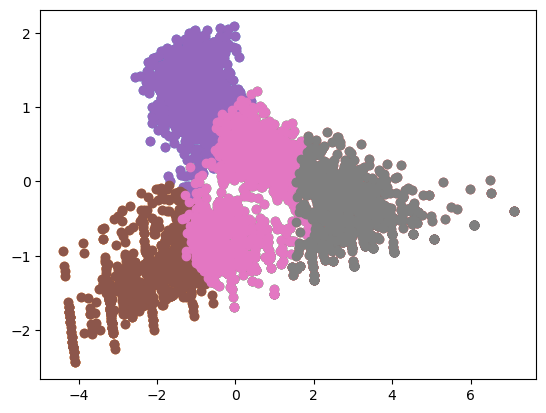

In [28]:
for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0],tmp[1])
plt.show()

In [30]:
customer_clustering_join = pd.concat([customer_clustering, customer], axis=1)
customer_clustering_join

,月内利用平均値,月内利用中央値,月内利用最大値,月内利用最小値,会員期間,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,routine_flg,mean,median,max,min,calc_date,membership_period
0,4.833333,5.0,8,2,47,2,OA832399,XXXX,C01,F,...,オールタイム,10500,通常,1,4.833333,5.0,8,2,2019-04-30,47
1,5.083333,5.0,7,3,47,2,PL270116,XXXXX,C01,M,...,オールタイム,10500,通常,1,5.083333,5.0,7,3,2019-04-30,47
2,4.583333,5.0,6,3,47,2,OA974876,XXXXX,C01,M,...,オールタイム,10500,通常,1,4.583333,5.0,6,3,2019-04-30,47
3,4.833333,4.5,7,2,47,2,HD024127,XXXXX,C01,F,...,オールタイム,10500,通常,1,4.833333,4.5,7,2,2019-04-30,47
4,3.916667,4.0,6,1,47,2,HD661448,XXXXX,C03,F,...,ナイト,6000,通常,1,3.916667,4.0,6,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3,HD676663,XXXX,C01,M,...,オールタイム,10500,通常,0,8.000000,8.0,8,8,2019-04-30,1
4188,10.000000,10.0,10,10,1,3,HD246549,XXXXX,C01,F,...,オールタイム,10500,通常,0,10.000000,10.0,10,10,2019-04-30,1
4189,8.000000,8.0,8,8,1,3,GD037007,XXXXX,C03,M,...,ナイト,6000,通常,0,8.000000,8.0,8,8,2019-04-30,1
4190,11.000000,11.0,11,11,1,3,OA953150,XXXXX,C01,M,...,オールタイム,10500,通常,0,11.000000,11.0,11,11,2019-04-30,1


In [33]:
customer_clustering_join.groupby(['cluster', 'is_deleted'], as_index=False).count()[['cluster', 'is_deleted','customer_id']]

,cluster,is_deleted,customer_id
0,0,0,791
1,0,1,543
2,1,1,771
3,2,0,1231
4,2,1,18
5,3,0,820
6,3,1,18


In [34]:
"""
cluster: 0　→会員期間長め、利用回数多い
cluster: 1　→会員期間短め、利用回数少ない
cluster: 2　→会員期間長い、利用回数多め
cluster: 3　→会員期間短い、利用回数多い
"""
customer_clustering.groupby('cluster').mean()


,月内利用平均値,月内利用中央値,月内利用最大値,月内利用最小値,会員期間
cluster,,,,,
0,5.541974,5.392804,8.757871,2.704648,14.857571
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,4.677561,4.670937,7.233787,2.153723,36.915933
3,8.064079,8.050716,10.014320,6.180191,7.016706


In [36]:
customer_clustering_join.groupby(['cluster', 'routine_flg'], as_index=False).count()[['cluster', 'routine_flg','customer_id']]

,cluster,routine_flg,customer_id
0,0,0,227
1,0,1,1107
2,1,0,499
3,1,1,272
4,2,0,2
5,2,1,1247
6,3,0,51
7,3,1,787
